### About Dataset
The dataset comprises information on 1000 customers, with 84 features derived from their financial transactions and current financial standing. The primary objective is to leverage this dataset for credit risk estimation and predicting potential defaults.

- CUST_ID: Unique customer identifier
Key Target Variables:

- CREDIT_SCORE: Numerical target variable representing the customer's credit score (integer)
- DEFAULT: Binary target variable indicating if the customer has defaulted (1) or not (0)
Description of Features:

- INCOME: Total income in the last 12 months
- SAVINGS: Total savings in the last 12 months
- DEBT: Total existing debt
- R_SAVINGS_INCOME: Ratio of savings to income
- R_DEBT_INCOME: Ratio of debt to income
- R_DEBT_SAVINGS: Ratio of debt to savings

### Transaction groups (GROCERIES, CLOTHING, HOUSING, EDUCATION, HEALTH, TRAVEL, ENTERTAINMENT, GAMBLING, UTILITIES, TAX, FINES) are categorized.

- T_{GROUP}_6: Total expenditure in that group in the last 6 months
- T_GROUP_12: Total expenditure in that group in the last 12 months
- R_[GROUP]: Ratio of T_[GROUP]6 to T[GROUP]_12
- R_[GROUP]INCOME: Ratio of T[GROUP]_12 to INCOME
- R_[GROUP]SAVINGS: Ratio of T[GROUP]_12 to SAVINGS
- R_[GROUP]DEBT: Ratio of T[GROUP]_12 to DEBT
### Categorical Features:

- CAT_GAMBLING: Gambling category (none, low, high)
- CAT_DEBT: 1 if the customer has debt; 0 otherwise
- CAT_CREDIT_CARD: 1 if the customer has a credit card; 0 otherwise
- CAT_MORTGAGE: 1 if the customer has a mortgage; 0 otherwise
- CAT_SAVINGS_ACCOUNT: 1 if the customer has a savings account; 0 otherwise
- CAT_DEPENDENTS: 1 if the customer has any dependents; 0 otherwise
### See XAI course based on this dataset: https://adataodyssey.com/courses/xai-with-python/

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../../data/credit_score.csv')
df.head()

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0


We are going to predict  default column

FULL Automatic EDA is not possible because of the number of columns. It generates 1 GB of html file. We will do it manually

In [2]:
target = 'DEFAULT'

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
INCOME,1000.0,121610.019000,113716.699591,0.0,30450.2500,85090.00000,1.812175e+05,6.620940e+05
SAVINGS,1000.0,413189.597000,442916.037068,0.0,59719.7500,273850.50000,6.222600e+05,2.911863e+06
DEBT,1000.0,790718.045000,981790.391354,0.0,53966.7500,395095.50000,1.193230e+06,5.968620e+06
R_SAVINGS_INCOME,1000.0,4.063477,3.968097,0.0,1.0000,2.54545,6.307100e+00,1.611120e+01
R_DEBT_INCOME,1000.0,6.068449,5.847878,0.0,1.4545,4.91155,8.587475e+00,3.700060e+01
...,...,...,...,...,...,...,...,...
CAT_MORTGAGE,1000.0,0.173000,0.378437,0.0,0.0000,0.00000,0.000000e+00,1.000000e+00
CAT_SAVINGS_ACCOUNT,1000.0,0.993000,0.083414,0.0,1.0000,1.00000,1.000000e+00,1.000000e+00
CAT_DEPENDENTS,1000.0,0.150000,0.357250,0.0,0.0000,0.00000,0.000000e+00,1.000000e+00
CREDIT_SCORE,1000.0,586.712000,63.413882,300.0,554.7500,596.00000,6.300000e+02,8.000000e+02


In [4]:
df.describe(include='object').T

,count,unique,top,freq
CUST_ID,1000,1000,C02COQEVYU,1
CAT_GAMBLING,1000,3,No,620


In [5]:
numerical_data = df.select_dtypes(include=[np.number])
#variance
numerical_data.var().sort_values(ascending=False)

DEBT                9.639124e+11
SAVINGS             1.961746e+11
INCOME              1.293149e+10
T_EXPENDITURE_12    7.965597e+09
T_EXPENDITURE_6     2.485415e+09
                        ...     
R_EDUCATION         3.648866e-06
R_UTILITIES         3.454595e-06
R_FINES_INCOME      1.933072e-06
R_FINES_DEBT        6.136601e-07
R_HOUSING           1.330329e-08
Length: 85, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

There are no missing values in the dataset

In [7]:
df.nunique()

CUST_ID                1000
INCOME                  951
SAVINGS                 992
DEBT                    943
R_SAVINGS_INCOME        463
                       ... 
CAT_MORTGAGE              2
CAT_SAVINGS_ACCOUNT       2
CAT_DEPENDENTS            2
CREDIT_SCORE            259
DEFAULT                   2
Length: 87, dtype: int64

In [8]:
# Let's check the distribution of the each gambing category according to the default
df['CAT_GAMBLING'].value_counts()

CAT_GAMBLING
No      620
High    264
Low     116
Name: count, dtype: int64

<Axes: xlabel='CAT_GAMBLING', ylabel='count'>

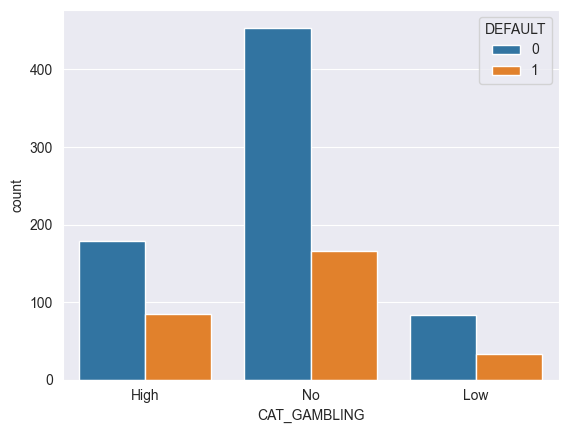

In [9]:
sns.countplot(data=df, x='CAT_GAMBLING', hue=target)

We see something interesting. People with high gambling category have higher default rate.

In [10]:
# Let's check the distribution of the each debt category according to the default
df['CAT_DEBT'].value_counts()

CAT_DEBT
1    944
0     56
Name: count, dtype: int64

<Axes: xlabel='CAT_DEBT', ylabel='count'>

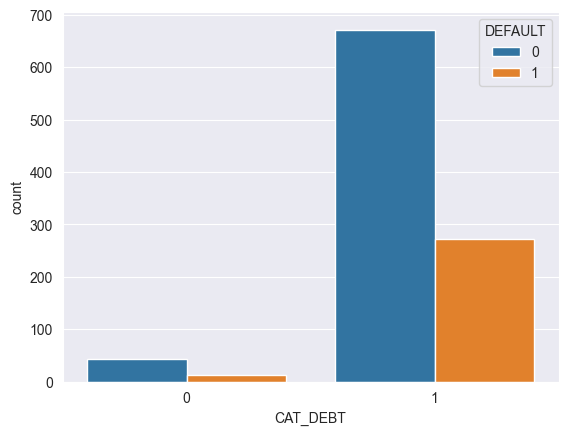

In [11]:
sns.countplot(data=df, x='CAT_DEBT', hue=target)

We see something interesting. People with debt have higher default rate, but there are small number of people without debt.

array([[<Axes: title={'center': 'INCOME'}>,
        <Axes: title={'center': 'SAVINGS'}>,
        <Axes: title={'center': 'DEBT'}>,
        <Axes: title={'center': 'R_SAVINGS_INCOME'}>,
        <Axes: title={'center': 'R_DEBT_INCOME'}>,
        <Axes: title={'center': 'R_DEBT_SAVINGS'}>,
        <Axes: title={'center': 'T_CLOTHING_12'}>,
        <Axes: title={'center': 'T_CLOTHING_6'}>,
        <Axes: title={'center': 'R_CLOTHING'}>],
       [<Axes: title={'center': 'R_CLOTHING_INCOME'}>,
        <Axes: title={'center': 'R_CLOTHING_SAVINGS'}>,
        <Axes: title={'center': 'R_CLOTHING_DEBT'}>,
        <Axes: title={'center': 'T_EDUCATION_12'}>,
        <Axes: title={'center': 'T_EDUCATION_6'}>,
        <Axes: title={'center': 'R_EDUCATION'}>,
        <Axes: title={'center': 'R_EDUCATION_INCOME'}>,
        <Axes: title={'center': 'R_EDUCATION_SAVINGS'}>,
        <Axes: title={'center': 'R_EDUCATION_DEBT'}>],
       [<Axes: title={'center': 'T_ENTERTAINMENT_12'}>,
        <Axes: title={

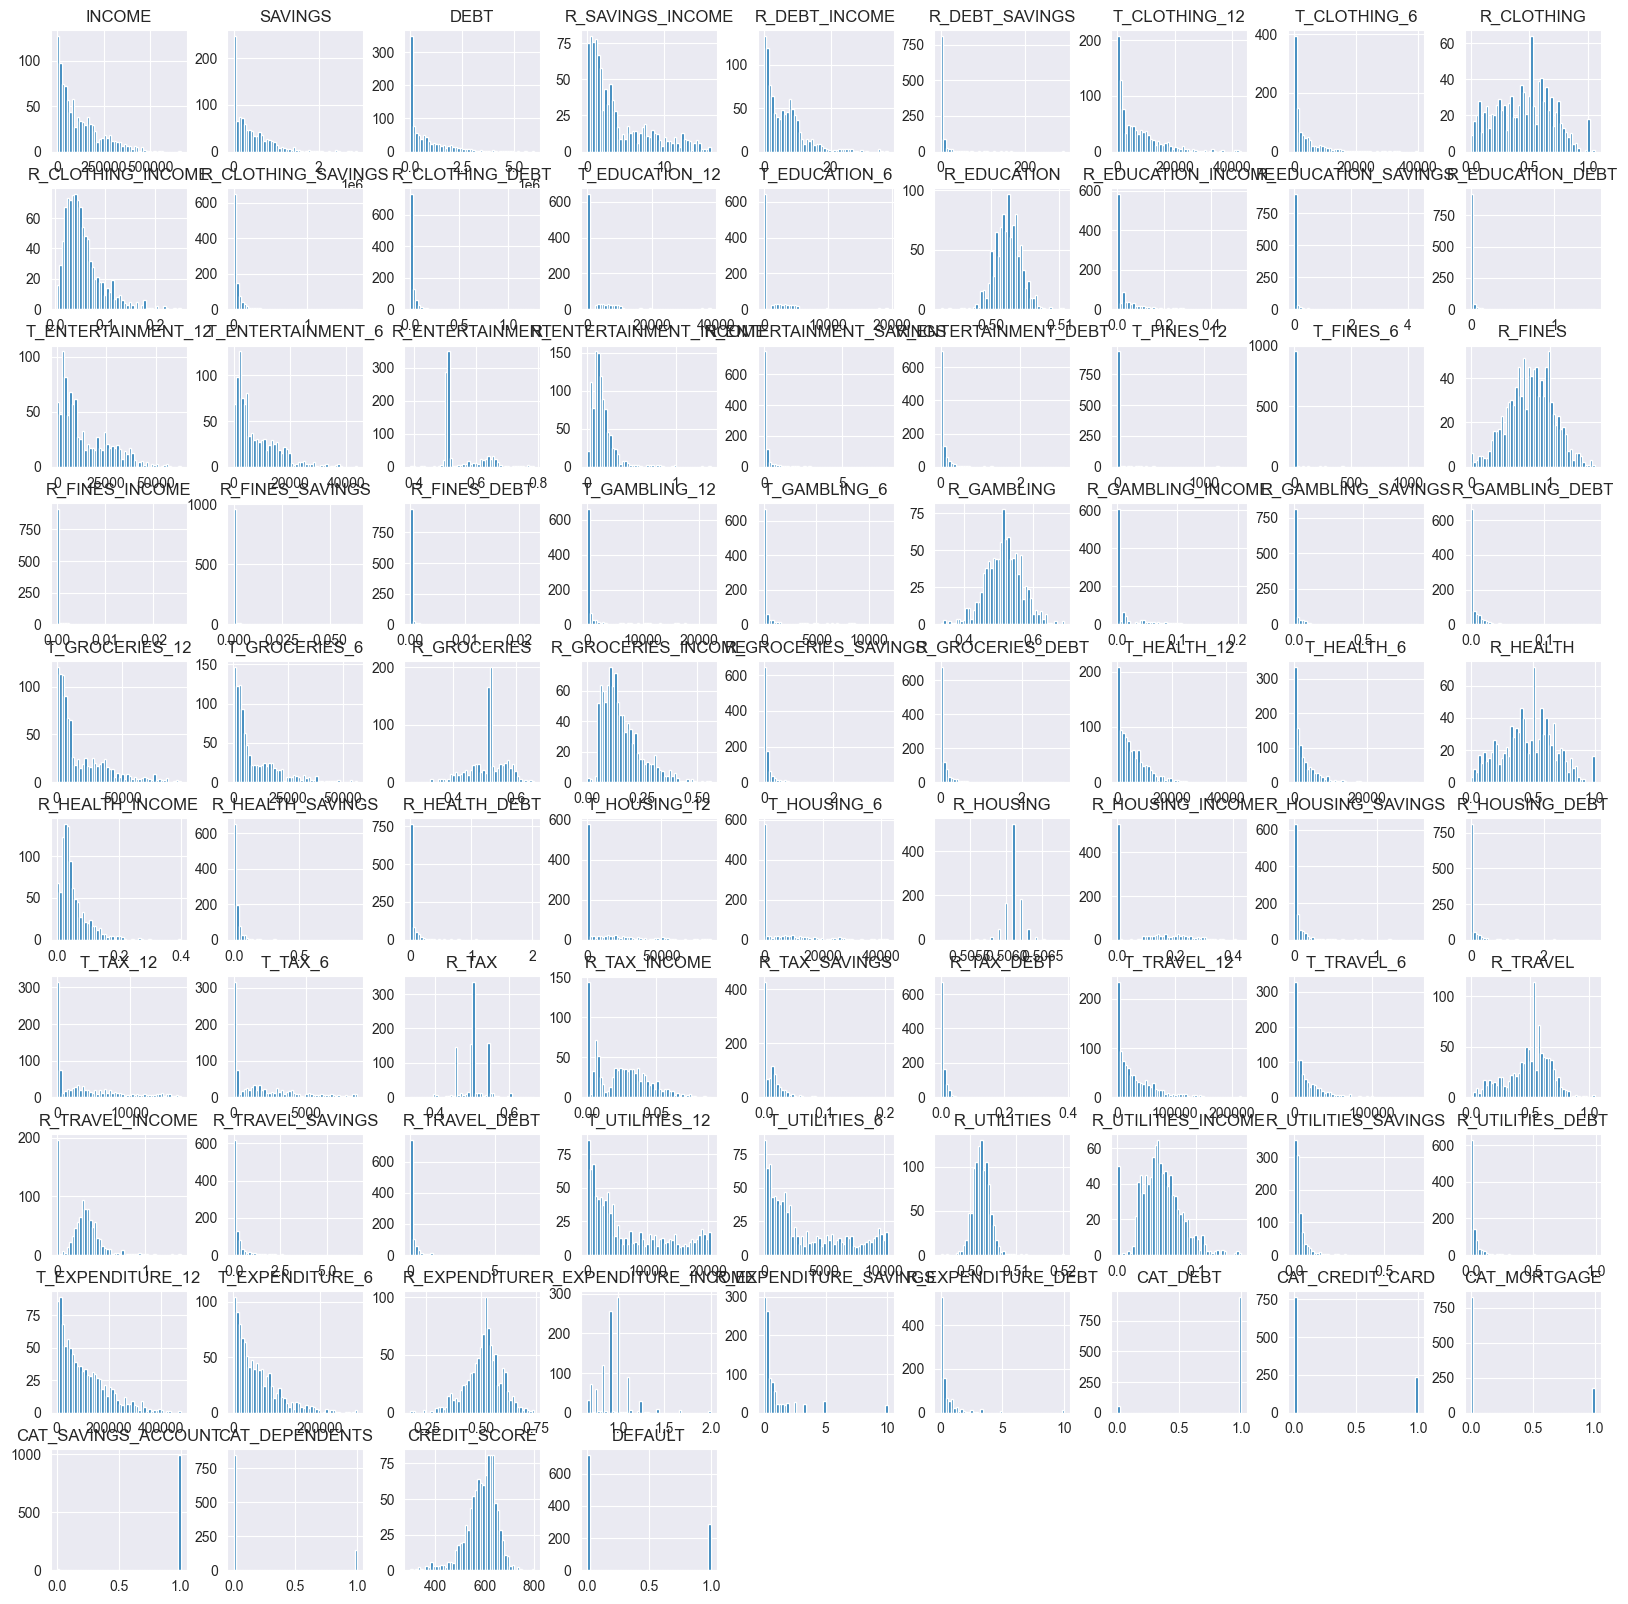

In [12]:
#plt.figure(figsize=(20,20))
df.hist(bins=50, figsize=(20,20))

In [13]:
#how many numeric columns are here
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns

['INCOME',
 'SAVINGS',
 'DEBT',
 'R_SAVINGS_INCOME',
 'R_DEBT_INCOME',
 'R_DEBT_SAVINGS',
 'T_CLOTHING_12',
 'T_CLOTHING_6',
 'R_CLOTHING',
 'R_CLOTHING_INCOME',
 'R_CLOTHING_SAVINGS',
 'R_CLOTHING_DEBT',
 'T_EDUCATION_12',
 'T_EDUCATION_6',
 'R_EDUCATION',
 'R_EDUCATION_INCOME',
 'R_EDUCATION_SAVINGS',
 'R_EDUCATION_DEBT',
 'T_ENTERTAINMENT_12',
 'T_ENTERTAINMENT_6',
 'R_ENTERTAINMENT',
 'R_ENTERTAINMENT_INCOME',
 'R_ENTERTAINMENT_SAVINGS',
 'R_ENTERTAINMENT_DEBT',
 'T_FINES_12',
 'T_FINES_6',
 'R_FINES',
 'R_FINES_INCOME',
 'R_FINES_SAVINGS',
 'R_FINES_DEBT',
 'T_GAMBLING_12',
 'T_GAMBLING_6',
 'R_GAMBLING',
 'R_GAMBLING_INCOME',
 'R_GAMBLING_SAVINGS',
 'R_GAMBLING_DEBT',
 'T_GROCERIES_12',
 'T_GROCERIES_6',
 'R_GROCERIES',
 'R_GROCERIES_INCOME',
 'R_GROCERIES_SAVINGS',
 'R_GROCERIES_DEBT',
 'T_HEALTH_12',
 'T_HEALTH_6',
 'R_HEALTH',
 'R_HEALTH_INCOME',
 'R_HEALTH_SAVINGS',
 'R_HEALTH_DEBT',
 'T_HOUSING_12',
 'T_HOUSING_6',
 'R_HOUSING',
 'R_HOUSING_INCOME',
 'R_HOUSING_SAVINGS',
 'R

In [14]:
len(numeric_columns)

85

In [15]:
# remove from numeric columns columns with T or R as first letter
numeric_columns = [col for col in numeric_columns if not col.startswith('T_') and not col.startswith('R_')]
# remove last one
numeric_columns = numeric_columns[:-1]
numeric_columns

['INCOME',
 'SAVINGS',
 'DEBT',
 'CAT_DEBT',
 'CAT_CREDIT_CARD',
 'CAT_MORTGAGE',
 'CAT_SAVINGS_ACCOUNT',
 'CAT_DEPENDENTS',
 'CREDIT_SCORE']

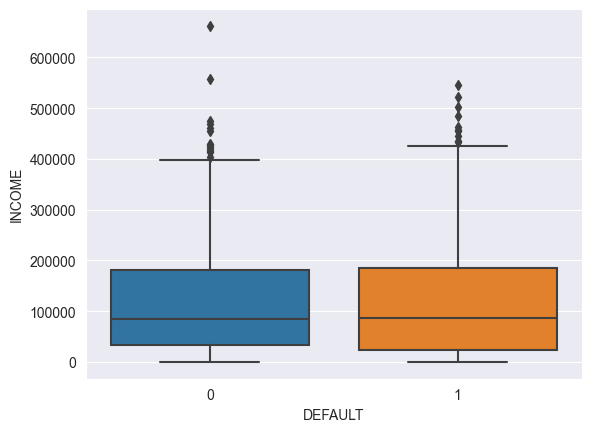

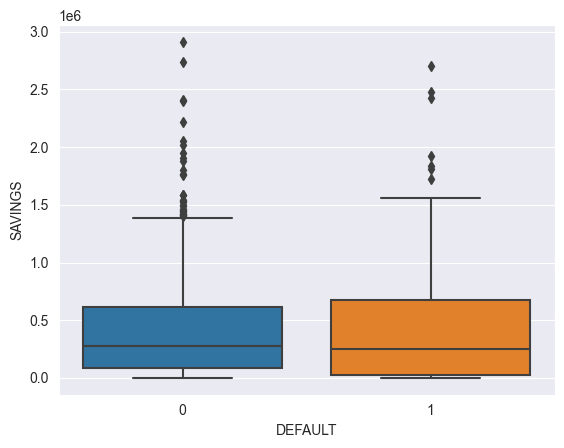

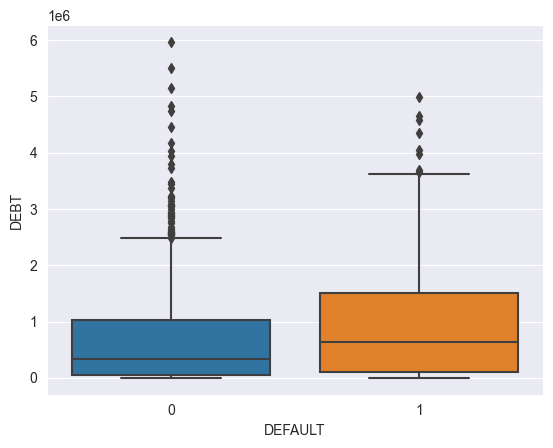

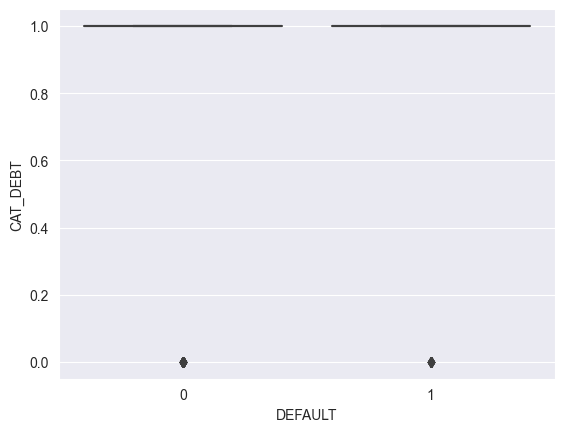

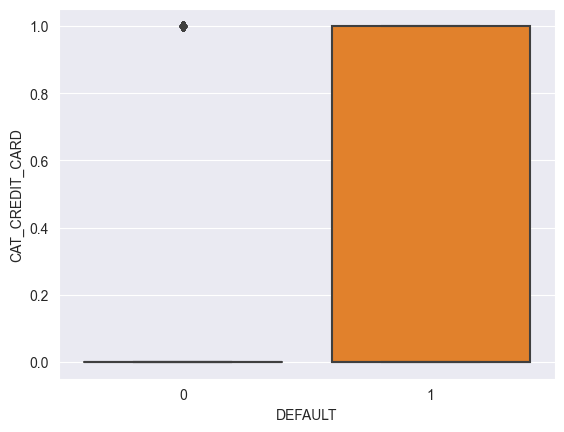

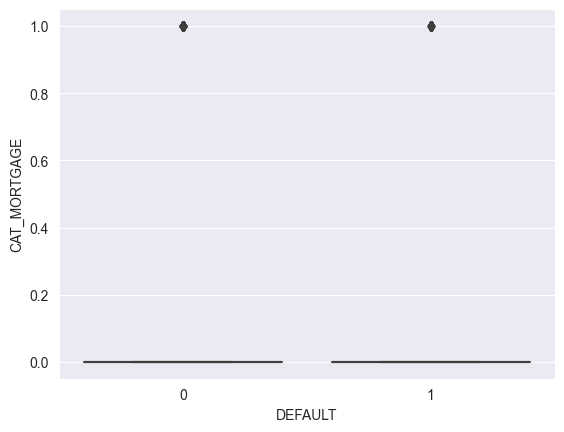

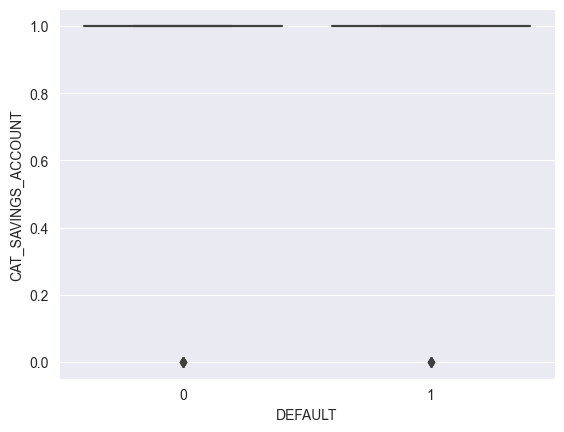

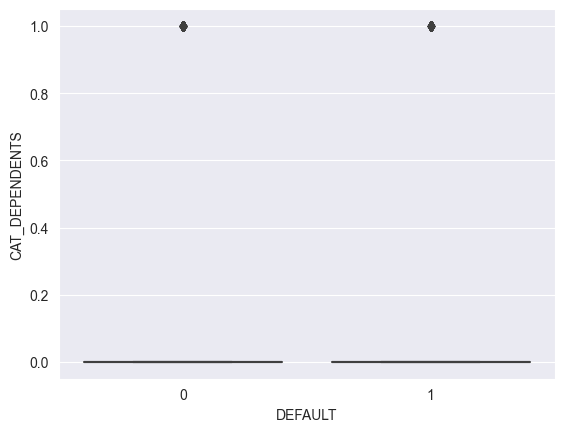

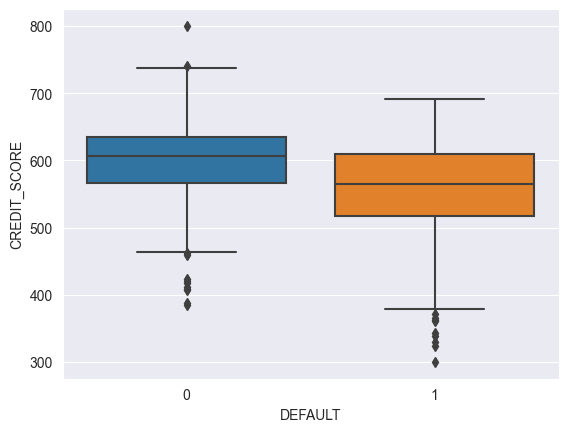

In [16]:
for col in numeric_columns:
    sns.boxplot(data=df, x=target, y=col)
    plt.show()

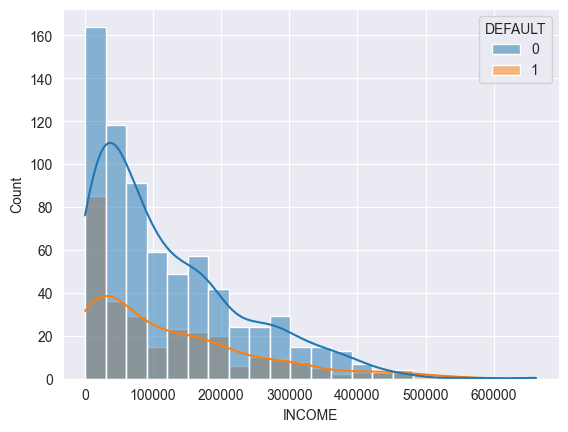

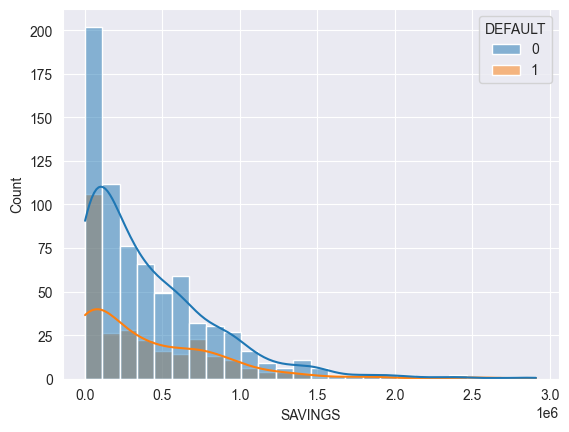

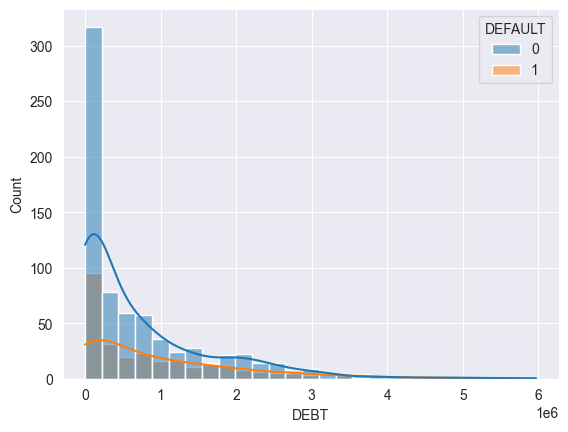

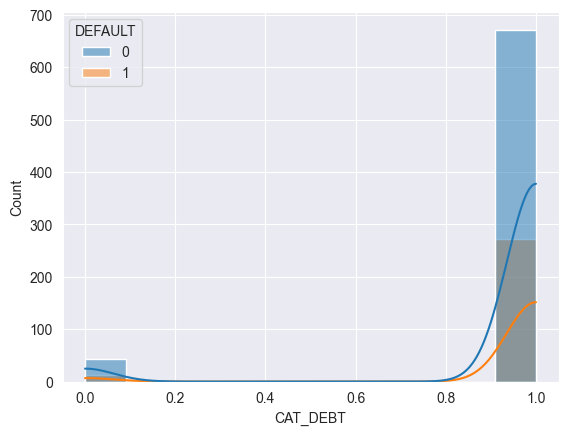

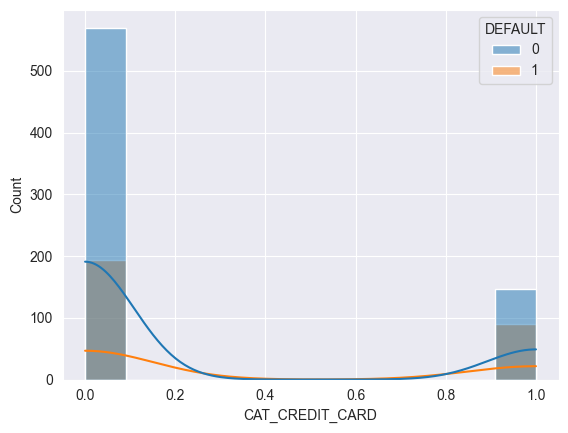

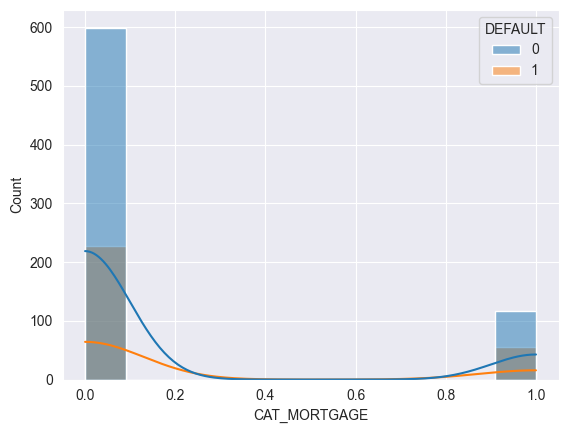

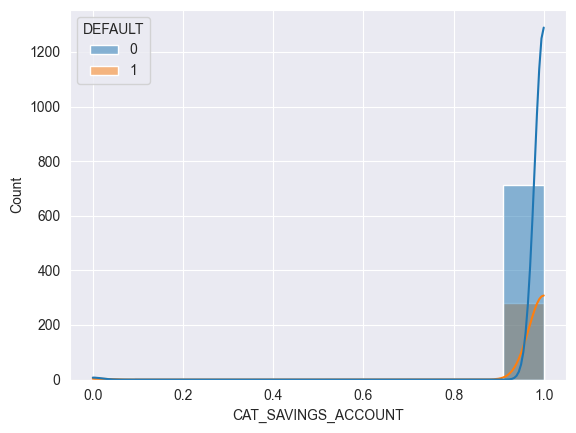

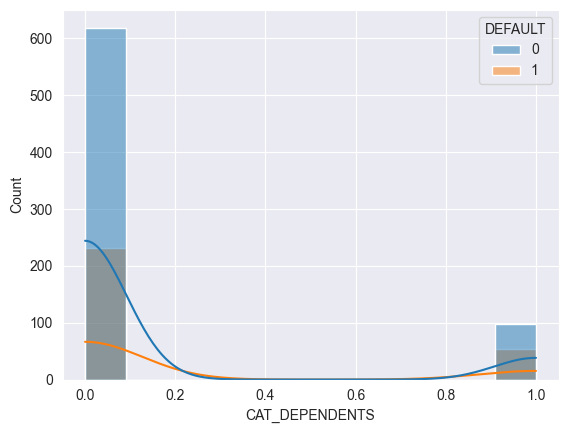

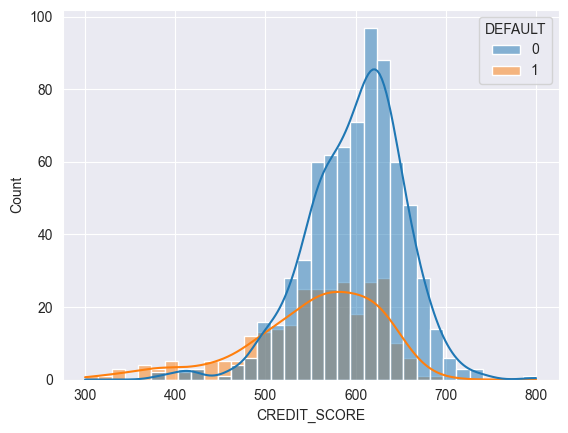

In [17]:
#histogram of numeric_columns
for col in numeric_columns:
    sns.histplot(data=df, x=col, hue=target, kde=True)
    plt.show()

In [18]:
#correlation matrix without first column
correlation_matrix = df[numeric_columns].corr()
correlation_matrix

,INCOME,SAVINGS,DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
INCOME,1.000000,0.649894,0.786988,0.232654,0.532841,0.389571,0.074662,0.208253,0.029466
SAVINGS,0.649894,1.000000,0.541347,0.205383,0.355932,0.377892,0.078365,0.525606,0.078628
DEBT,0.786988,0.541347,1.000000,0.196258,0.665055,0.330360,0.038085,0.353676,-0.327231
CAT_DEBT,0.232654,0.205383,0.196258,1.000000,0.135368,0.111398,0.031718,0.102316,-0.194959
CAT_CREDIT_CARD,0.532841,0.355932,0.665055,0.135368,1.000000,0.206535,0.018417,0.228201,-0.226802
CAT_MORTGAGE,0.389571,0.377892,0.330360,0.111398,0.206535,1.000000,0.006691,0.229896,0.017887
CAT_SAVINGS_ACCOUNT,0.074662,0.078365,0.038085,0.031718,0.018417,0.006691,1.000000,0.035270,0.128868
CAT_DEPENDENTS,0.208253,0.525606,0.353676,0.102316,0.228201,0.229896,0.035270,1.000000,-0.156451
CREDIT_SCORE,0.029466,0.078628,-0.327231,-0.194959,-0.226802,0.017887,0.128868,-0.156451,1.000000


<Axes: >

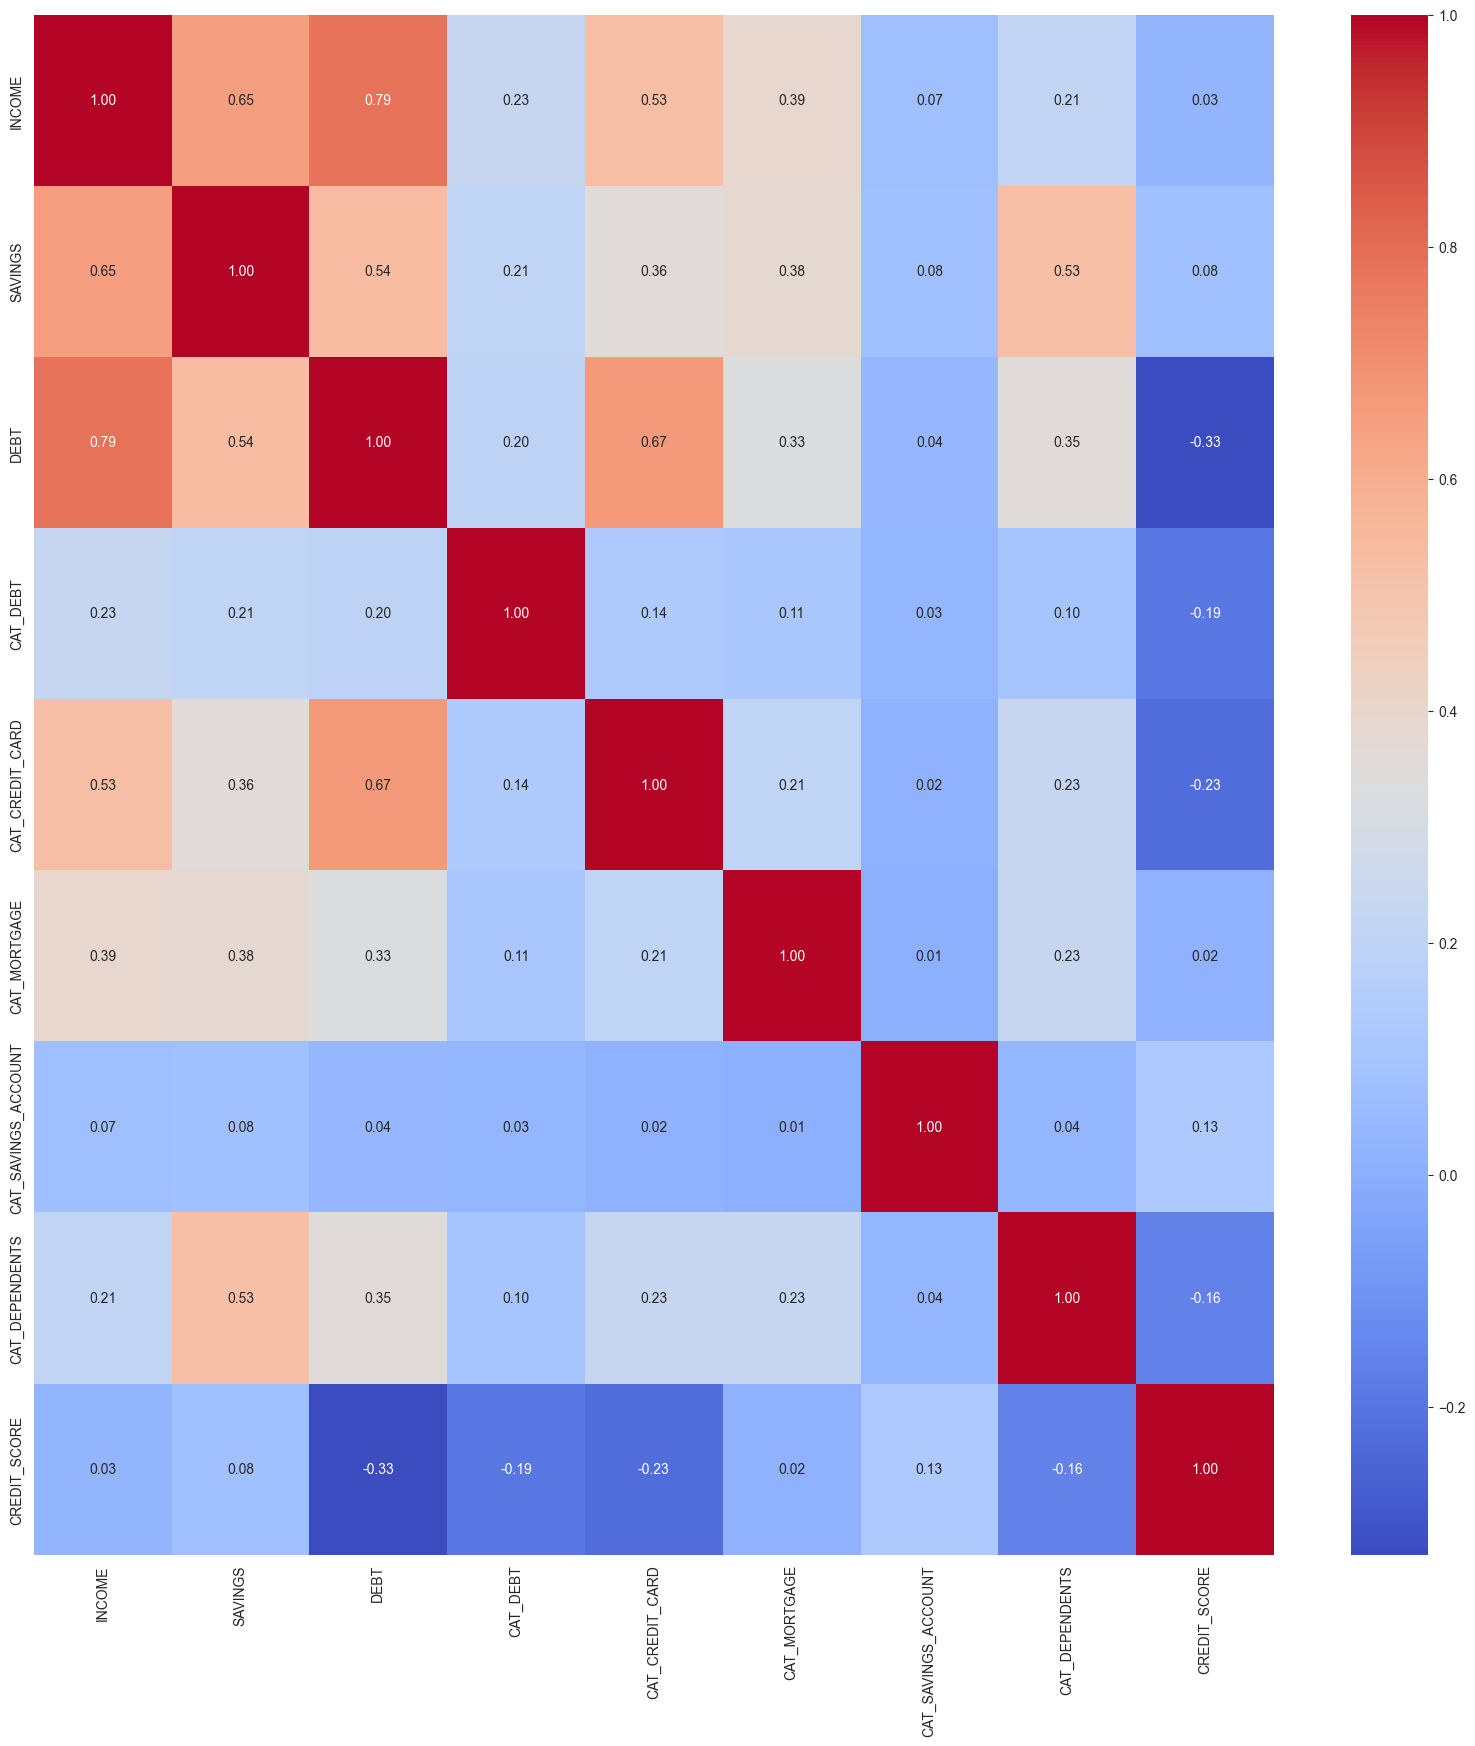

In [19]:
#correlation matrix heatmap
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

In [20]:
df_numeric = df[numeric_columns]
df_numeric

,INCOME,SAVINGS,DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,33269,0,532304,1,0,0,0,0,444
1,77158,91187,315648,1,0,0,1,0,625
2,30917,21642,534864,1,0,0,1,0,469
3,80657,64526,629125,1,0,0,1,0,559
4,149971,1172498,2399531,1,1,1,1,1,473
...,...,...,...,...,...,...,...,...,...
995,328892,1465066,5501471,1,1,1,1,1,418
996,81404,88805,680837,1,0,0,1,0,589
997,0,42428,30760,1,0,0,1,0,499
998,36011,8002,604181,1,1,0,1,0,507


In [22]:
#autoEDA
from pandas_profiling import ProfileReport
profile = ProfileReport(df_numeric, title='Pandas Profiling Report', explorative=True)
profile.to_file("output.html")

/opt/homebrew/lib/python3.11/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### We will try to find some columns that we should remove
- We will take a look at the correlation matrix

In [25]:
df_without_id= df.drop('CUST_ID', axis=1).drop("CAT_GAMBLING", axis=1)
correlation_matrix = df_without_id.corr()
correlation_matrix

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
INCOME,1.000000,0.649894,0.786988,-0.182221,0.076101,-0.142151,0.778359,0.656653,0.111430,0.015526,...,-0.564984,-0.274424,-0.214238,0.232654,0.532841,0.389571,0.074662,0.208253,0.029466,0.008659
SAVINGS,0.649894,1.000000,0.541347,0.383950,-0.003358,-0.220234,0.371858,0.320937,0.078950,-0.200351,...,-0.316413,-0.379897,-0.023622,0.205383,0.355932,0.377892,0.078365,0.525606,0.078628,-0.007557
DEBT,0.786988,0.541347,1.000000,-0.183566,0.433047,-0.024625,0.563861,0.463386,0.068198,-0.034099,...,-0.420153,-0.206958,-0.294336,0.196258,0.665055,0.330360,0.038085,0.353676,-0.327231,0.114561
R_SAVINGS_INCOME,-0.182221,0.383950,-0.183566,1.000000,-0.309957,-0.265868,-0.275307,-0.203593,0.036572,-0.261873,...,0.062651,-0.419965,0.305428,0.172723,-0.129015,0.002600,0.086022,0.150480,0.248420,-0.060483
R_DEBT_INCOME,0.076101,-0.003358,0.433047,-0.309957,1.000000,0.532274,0.025931,0.008662,-0.026952,0.008128,...,-0.065574,0.049637,-0.353934,0.252874,0.290842,0.034695,-0.116808,0.221587,-0.857900,0.293035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAT_MORTGAGE,0.389571,0.377892,0.330360,0.002600,0.034695,-0.068640,0.196625,0.153958,0.026921,-0.090558,...,-0.177417,-0.126376,-0.102494,0.111398,0.206535,1.000000,0.006691,0.229896,0.017887,0.040266
CAT_SAVINGS_ACCOUNT,0.074662,0.078365,0.038085,0.086022,-0.116808,0.013685,0.066679,0.050065,0.017745,0.030154,...,-0.055110,-0.010245,0.018121,0.031718,0.018417,0.006691,1.000000,0.035270,0.128868,-0.026918
CAT_DEPENDENTS,0.208253,0.525606,0.353676,0.150480,0.221587,-0.095454,0.001841,0.007208,0.016771,-0.188365,...,-0.073544,-0.184067,-0.104476,0.102316,0.228201,0.229896,0.035270,1.000000,-0.156451,0.064590
CREDIT_SCORE,0.029466,0.078628,-0.327231,0.248420,-0.857900,-0.454068,0.007252,-0.017520,-0.069328,-0.044721,...,-0.030981,-0.074449,0.307594,-0.194959,-0.226802,0.017887,0.128868,-0.156451,1.000000,-0.333092


In [30]:
#take only where correlation is higher than 0.6
high_correlation_matrix=correlation_matrix[correlation_matrix > 0.6]
#remove rows and columns with all NaN
high_correlation_matrix=high_correlation_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')
high_correlation_matrix

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
INCOME,1.000000,0.649894,0.786988,NaN,NaN,NaN,0.778359,0.656653,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAVINGS,0.649894,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEBT,0.786988,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.665055,NaN,NaN,NaN,NaN,NaN
R_SAVINGS_INCOME,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R_DEBT_INCOME,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAT_MORTGAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
CAT_SAVINGS_ACCOUNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
CAT_DEPENDENTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
CREDIT_SCORE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


<Axes: >

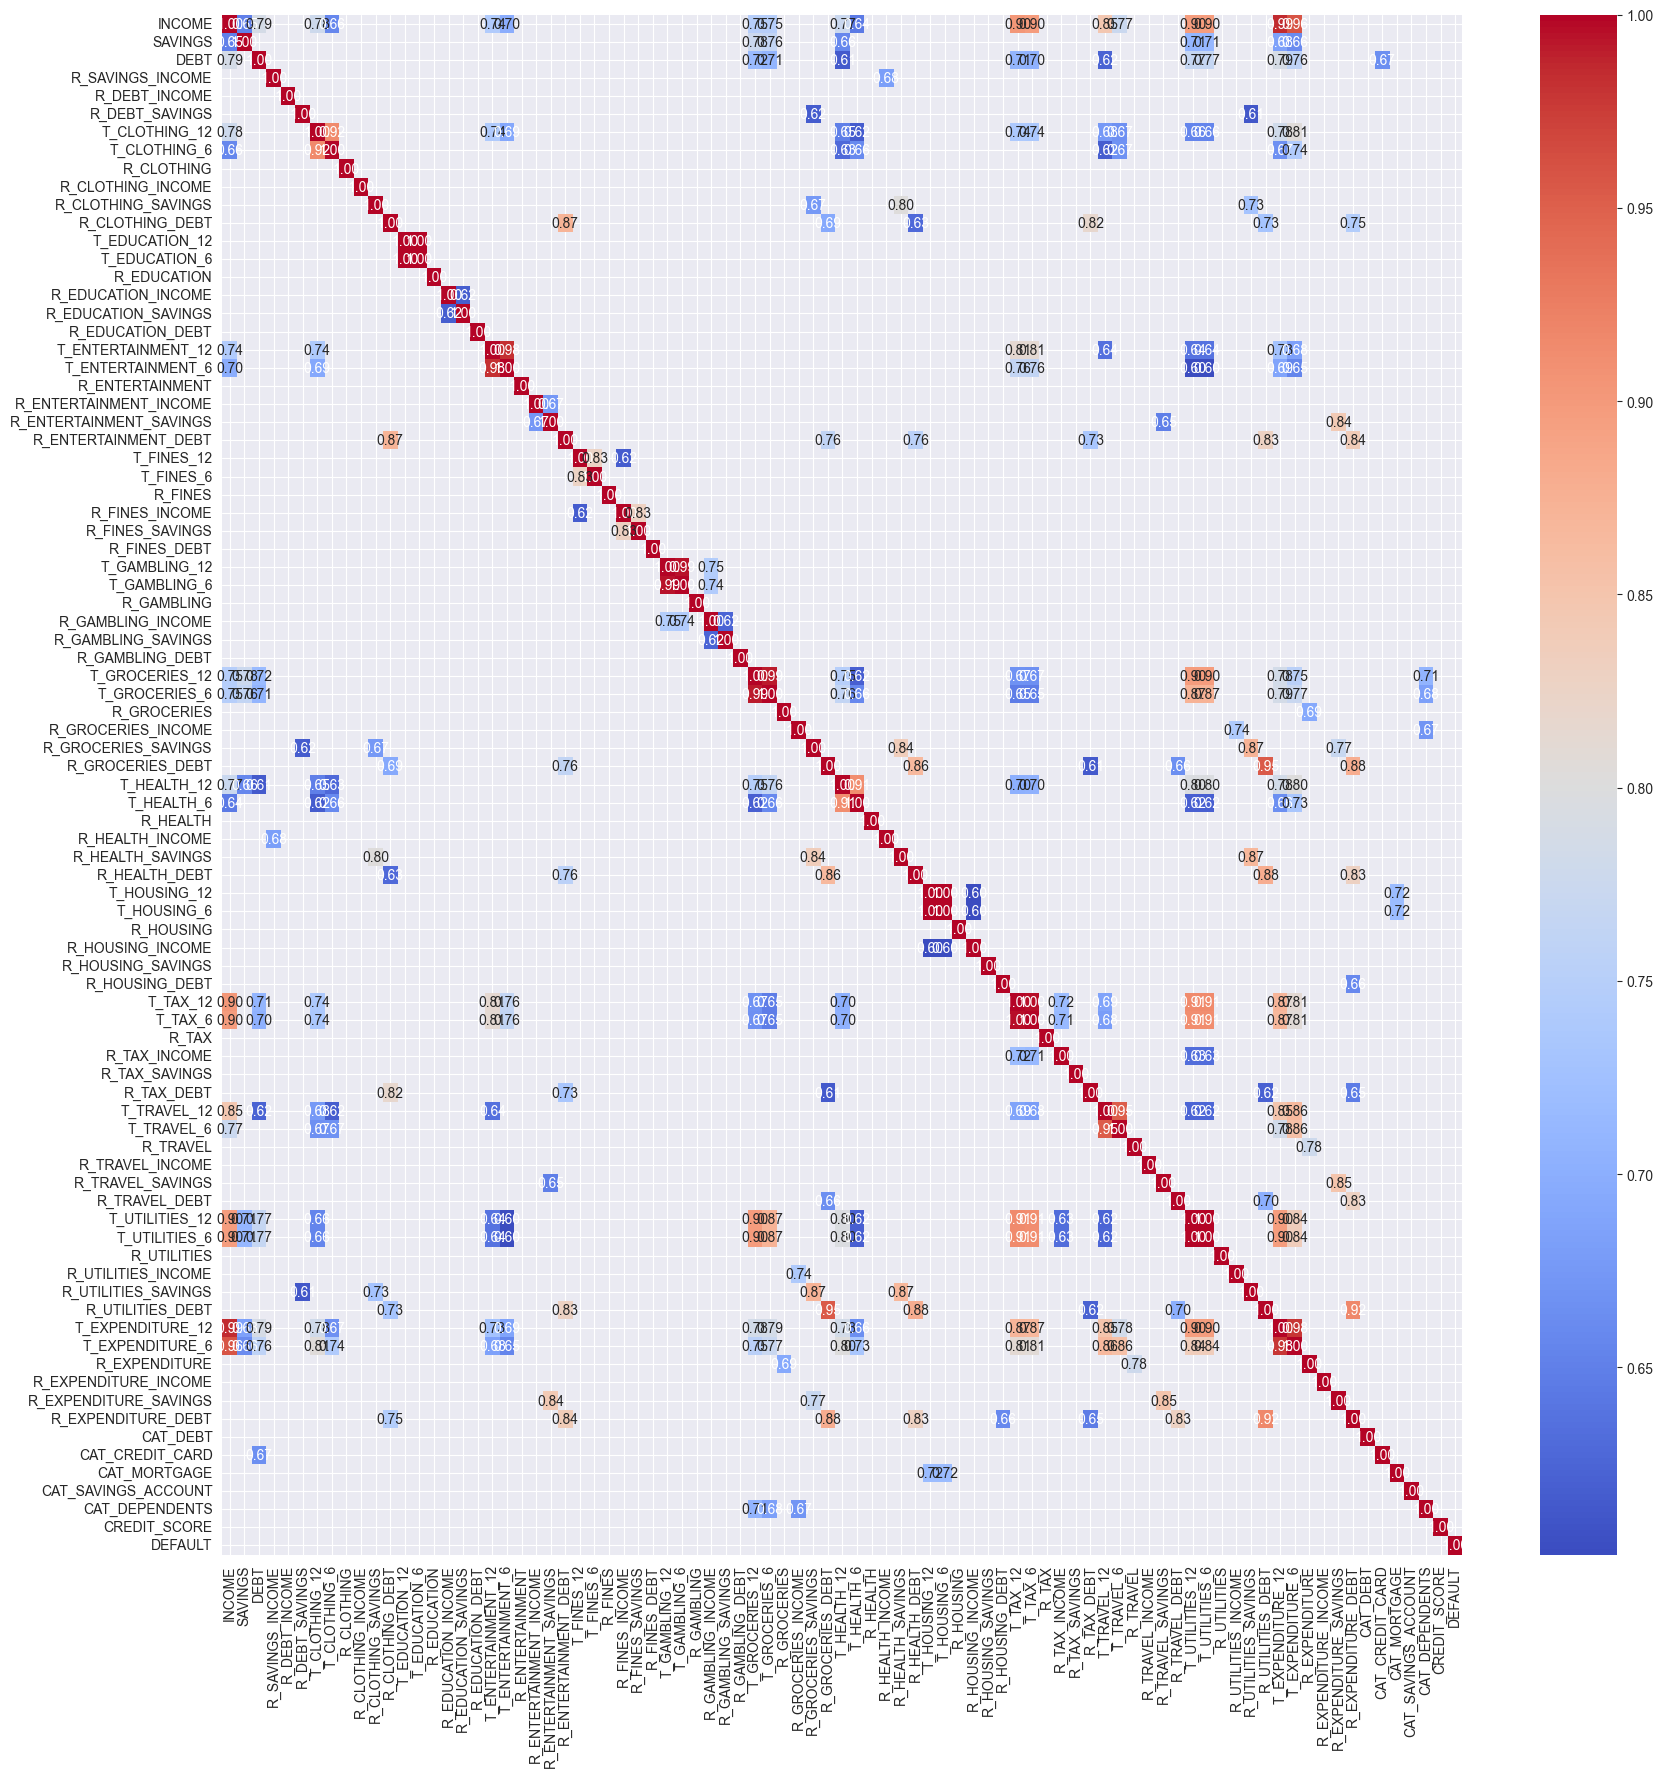

In [31]:
# plot heatmap
plt.figure(figsize=(20,20))
sns.heatmap(high_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

### Canditates for removal - high correlation with other columns
- T_TAX_6
- T_TAX_12
- T_UTILITIES_6
- T_UTILITIES_12
- T_EXPENDITURE_6
- T_EXPENDITURE_12


<Axes: xlabel='INCOME', ylabel='Count'>

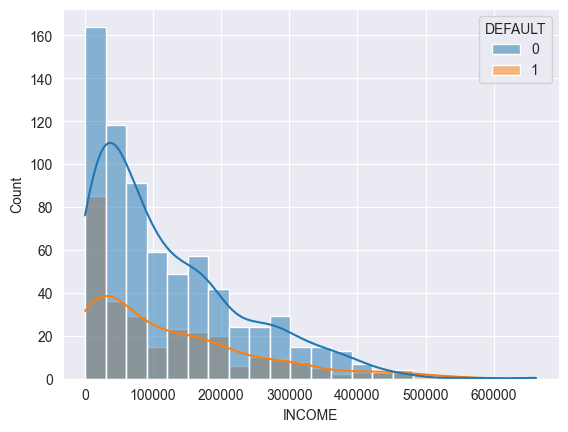

In [33]:
# stwórz histogram po Income dla DEFAULT=0 i DEFAULT=1
sns.histplot(data=df, x='INCOME', hue=target, kde=True)